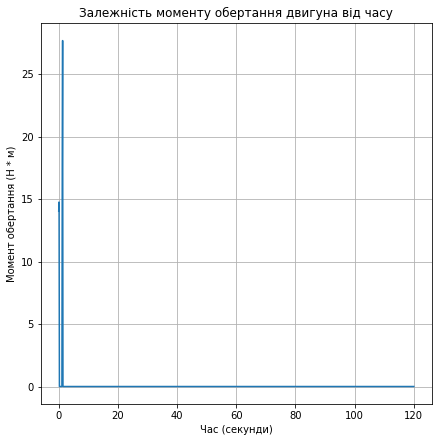

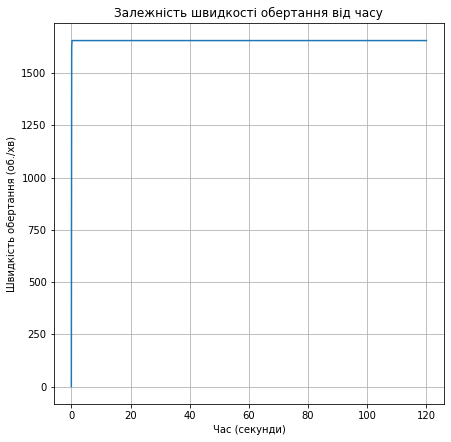

In [1]:
%run 3phase_pm_engine_simulation.ipynb

In [2]:
from tqdm.notebook import trange
import pandas as pd

In [3]:
possible_densities = tf.random.uniform((1_000_000, 17), minval=5, maxval=50, dtype="float32", seed=42)
parameters = tf.random.uniform((1_000_000, 12), minval=16, maxval=24, dtype="float32", seed=42)

In [4]:
parameters = tf.concat([possible_densities, parameters], axis=1)

In [ ]:
good_params = []
for index in trange(parameters.shape[0]):
    _, mass = calculate_center_of_mass(parameters[index])
    if 4 <= mass <= 8:
        good_params.append(parameters[index].numpy())

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [17]:
g_params = [i.numpy() for i in good_params]

In [20]:
df = pd.DataFrame.from_records(np.array(g_params))

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,47.852215,35.483349,40.789322,39.010181,26.418003,33.395668,13.370916,10.143849,20.129982,37.550076,...,23.290321,22.930664,18.803226,20.388603,17.274935,23.641640,18.181509,17.771479,21.940502,22.585560
1,21.271492,7.017729,48.747475,42.277481,23.656282,32.074966,20.281408,30.789621,15.631498,35.365303,...,18.126972,17.515060,18.736458,17.557917,23.347153,19.391457,16.655663,17.357239,18.156464,22.041084
2,16.454298,17.266167,25.914997,18.146740,14.453725,24.174446,46.995750,23.783478,37.169041,30.481146,...,23.743114,22.773630,20.443180,18.042015,19.294508,22.711330,21.550505,21.713373,17.566971,21.820410
3,30.555342,11.459092,11.628479,40.820404,16.642155,13.737366,49.505657,10.285615,9.505312,48.672531,...,23.887112,17.889275,20.355480,17.717634,18.914383,21.847799,18.787544,23.674591,19.055019,20.667669
4,23.856905,16.446531,45.023891,43.328838,46.529285,33.348129,27.831150,17.622068,36.831844,11.322756,...,22.539314,17.643341,17.884251,20.158504,21.563244,19.507435,20.559509,18.921185,16.477798,22.452587


In [22]:
df.to_csv("params.csv", index=False, header=False)

In [23]:
t = np.linspace(0, 120, 1000)

In [51]:
df = pd.read_csv("params.csv", header=None)

In [52]:
good_params = df.to_numpy()
good_params = [tf.constant(g, dtype="float32") for g in good_params]

In [53]:
efficiencies = []

In [54]:
for i in trange(len(good_params)):
    eff = evaluate_efficiency(good_params[i], t)
    efficiencies.append(eff.numpy())
    if i >= 1000 and i % 1000 == 0:
        df = pd.DataFrame(efficiencies)
        df.to_csv("calculated_efficiencies.csv", index=False, header=False)

  0%|          | 0/62364 [00:00<?, ?it/s]

In [55]:
df = pd.DataFrame(efficiencies)
df.to_csv("calculated_efficiencies.csv", index=False, header=False)

In [56]:
df = pd.DataFrame(np.array(efficiencies))

In [57]:
df.mean()

0    0.511146
dtype: float32

In [58]:
df.std()

0    0.067722
dtype: float32

In [59]:
df.max()

0    0.784475
dtype: float32

In [60]:
df.min()

0    1.565178e-08
dtype: float32

In [61]:
df.head()

,0
0,0.567362
1,0.470978
2,0.551705
3,0.491741
4,0.520799


In [62]:
pdf = pd.read_csv("params.csv", header=None)

In [65]:
full_df = pd.concat([pdf, df], axis=1)
full_df.columns = [i for i in range(30)]

In [66]:
full_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,47.852215,35.483350,40.789320,39.010180,26.418003,33.395668,13.370916,10.143849,20.129982,37.550076,...,22.930664,18.803226,20.388603,17.274935,23.641640,18.181509,17.771479,21.940502,22.585560,0.567362
1,21.271492,7.017729,48.747475,42.277480,23.656282,32.074966,20.281408,30.789621,15.631498,35.365303,...,17.515060,18.736458,17.557917,23.347153,19.391457,16.655663,17.357239,18.156464,22.041084,0.470978
2,16.454298,17.266167,25.914997,18.146740,14.453725,24.174446,46.995750,23.783478,37.169040,30.481146,...,22.773630,20.443180,18.042015,19.294508,22.711330,21.550505,21.713373,17.566970,21.820410,0.551705
3,30.555342,11.459092,11.628479,40.820404,16.642155,13.737366,49.505657,10.285615,9.505312,48.672530,...,17.889275,20.355480,17.717634,18.914383,21.847800,18.787544,23.674591,19.055020,20.667670,0.491741
4,23.856905,16.446531,45.023890,43.328840,46.529285,33.348130,27.831150,17.622068,36.831844,11.322756,...,17.643341,17.884250,20.158504,21.563244,19.507435,20.559510,18.921185,16.477798,22.452587,0.520799


In [67]:
best = full_df[full_df[29] == full_df[29].max()]

In [68]:
best

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1211,41.61702,37.77215,10.352745,21.651165,5.676679,25.11027,16.478386,10.853578,5.301185,12.53807,...,20.230223,22.006504,16.216133,23.267712,21.76094,23.108746,22.178432,18.204014,20.025913,0.784475


(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[0.00404178],
        [0.06578645]], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.9094315>)

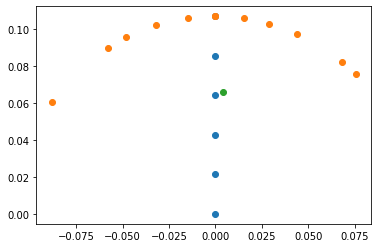

In [84]:
calculate_center_of_mass(tf.reshape(tf.constant(best.iloc[:, :29].to_numpy(), dtype="float32"), (29,)), show_plots=True)

In [83]:
tf.reshape(tf.constant(best.iloc[:, :29].to_numpy(), dtype="float32"), (29,))

<tf.Tensor: shape=(29,), dtype=float32, numpy=
array([41.61702  , 37.77215  , 10.352745 , 21.651165 ,  5.6766787,
       25.11027  , 16.478386 , 10.853578 ,  5.301185 , 12.53807  ,
        6.0658455, 37.686214 , 23.470785 , 28.084785 ,  7.2224836,
        8.880968 , 36.369125 , 19.71199  , 22.850271 , 20.796696 ,
       20.230223 , 22.006504 , 16.216133 , 23.267712 , 21.76094  ,
       23.108746 , 22.178432 , 18.204014 , 20.025913 ], dtype=float32)>

<tf.Tensor: shape=(), dtype=float32, numpy=0.7844752>

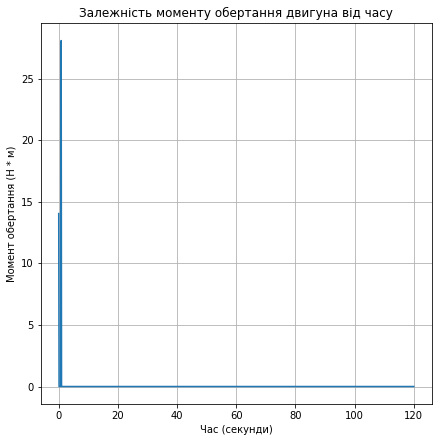

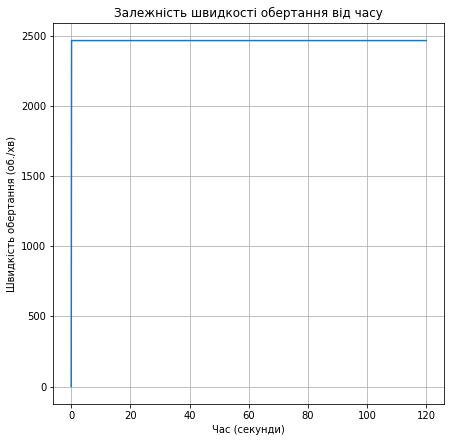

In [85]:
evaluate_efficiency(tf.reshape(tf.constant(best.iloc[:, :29].to_numpy(), dtype="float32"), (29,)), t, True)

In [86]:
full_df.to_csv("full_df.csv", index=False, header=False)

In [3]:
full_df = pd.read_csv("full_df.csv", header=None)

In [6]:
full_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,...,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,62364.000000,6.236400e+04
mean,25.400311,25.453717,25.396961,25.452527,25.447544,27.494896,25.808743,25.872559,25.926155,25.819324,...,20.007233,20.035347,20.324825,20.003963,20.017181,20.005974,20.017858,20.026327,20.334232,5.111463e-01
std,12.780554,12.800172,12.791444,12.758855,12.769628,13.020563,12.819280,12.835393,12.831937,12.817533,...,2.303390,2.283654,2.256710,2.309544,2.317694,2.316451,2.303041,2.286688,2.252501,6.772165e-02
min,5.000515,5.000317,5.000327,5.000982,5.000021,5.000370,5.000172,5.000966,5.000360,5.000568,...,16.000084,16.000238,16.000065,16.000114,16.000000,16.000100,16.000030,16.000072,16.000126,1.565178e-08
25%,14.277977,14.364701,14.222075,14.344979,14.369988,16.207468,14.647534,14.702544,14.712956,14.674438,...,18.017013,18.080188,18.458934,17.997635,17.995074,17.997494,18.025174,18.066345,18.477078,4.812423e-01
50%,24.434613,24.533262,24.360536,24.520503,24.430065,27.479076,25.063921,25.045355,25.198195,25.023787,...,20.002737,20.037742,20.454145,20.007626,20.026952,20.006498,20.023398,20.025013,20.483981,5.117821e-01
75%,35.985794,36.055445,36.049779,36.039434,36.076413,38.783558,36.492987,36.616639,36.708900,36.627257,...,22.005584,22.010333,22.277680,22.019618,22.032996,22.012519,22.008905,21.998136,22.281278,5.455824e-01
max,49.995995,49.999706,49.998630,49.999737,49.999886,49.999897,49.997826,49.999725,49.999780,49.997124,...,23.999933,24.000000,23.999980,23.999680,23.999931,23.999924,23.999886,23.999989,23.999952,7.844752e-01
